#Multiple variables linear regression

#Data preprocessing

In [1]:
import pandas as pd
from sklearn import preprocessing as preprocessing
from sklearn.model_selection import train_test_split as split
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('/sgemm_product.csv')


In [3]:
dataset['Run_average'] =  dataset[['Run1 (ms)', 'Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
dataset.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
dataset = dataset.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
dataset.dropna()
dataset.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_average
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [4]:
# splitting data
X = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

In [5]:
# applying mean normalization on X
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()


In [6]:
#To take into account the intercept, add an additional first column to X set to 1
X_train = np.append(np.ones((len(X_train),1)),X_train, axis=1)
X_test = np.append(np.ones((len(X_test),1)),X_test, axis=1)


#Gradient decent

In [7]:
def predict(X,weights):
    return np.matmul(X,weights)

In [8]:
def computeCost(X, y, weights):
    #this is Xtranspose dot theta
    predictions = predict(X,weights)
    #errors
    subtraction = np.subtract(predictions, y)
    #squared errors
    squaredErrors = np.square(subtraction)
    #final cost
    MSE = 1 / (2 * len(X)) * np.sum(squaredErrors)
    return MSE

In [9]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    errorPerIteration = np.zeros(iterations)
    
    for i in range(iterations):
      predictions= predict(X,weights)
      errors = np.subtract(predictions, y)
      sum_delta = (learning_rate / len(X)) *np.matmul(X.transpose(),errors)
      weights = np.subtract(weights, sum_delta)
      errorPerIteration[i] = computeCost(X, y, weights) 
        
    return weights, errorPerIteration

In [10]:
weights = np.ones(15)
iterations = 500
learning_rate = 0.15
weights, errorPerIteration = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

In [11]:
print(weights)

[ 216.42985643  141.25397776  129.29550929   40.17115942 -129.90714452
 -128.1344881     8.90691736    9.04440891   11.62327878   -3.78480575
   -6.00949278   -4.78727973    0.70444068   19.40279933   22.83802435]


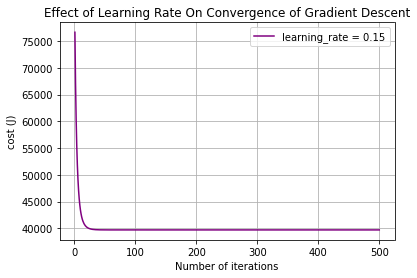

In [15]:
plt.plot(range(1, iterations +1), errorPerIteration, color ='purple', label = 'learning_rate = 0.15')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.ylabel("cost (J)")
plt.xlabel("Number of iterations")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()


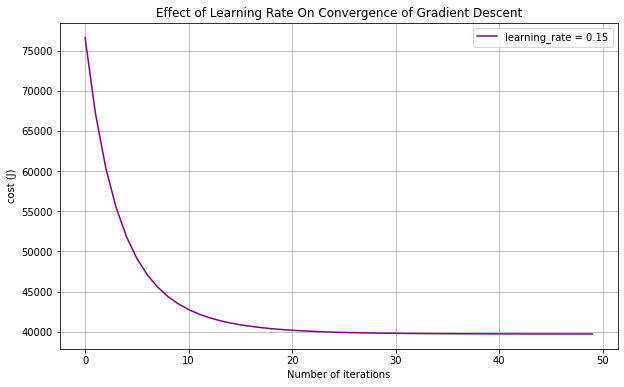

In [16]:
plt.plot(range(0, 50), errorPerIteration[0:50], color ='purple', label = 'learning_rate = 0.15')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.ylabel("cost (J)")
plt.xlabel("Number of iterations")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()


#Predict on testing set

In [13]:
testPredictions = predict(X_test,weights)
error= computeCost(X_test,y_test,weights) 

In [14]:
print(error)

41467.21842897321
